In [7]:
import pandas as pd;
import matplotlib.pyplot as plt;

file_data = pd.read_csv('data.csv')
file_data.head()

Matplotlib is building the font cache; this may take a moment.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
file_data = file_data.drop(["id"], axis=1)
file_data = file_data.drop(["Unnamed: 32"], axis=1)

file_data.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


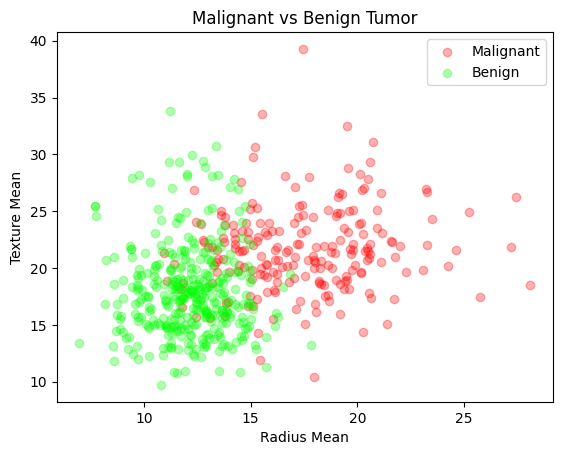

In [9]:
M = file_data[file_data.diagnosis == "M"]
B = file_data[file_data.diagnosis == "B"]

plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [10]:
file_data.diagnosis = [1 if i == "M" else 0 for i in file_data.diagnosis]
file_data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [11]:
x = file_data.drop(["diagnosis"], axis = 1)
y = file_data.diagnosis.values

In [13]:
import numpy as np

x = (x - np.min(x)) / (np.max(x) - np.min(x))

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)


c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.m

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=123)
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.958041958041958

[Text(0.625, 0.9375, 'x[7] <= 0.255\nentropy = 0.951\nsamples = 426\nvalue = [268, 158]'),
 Text(0.3611111111111111, 0.8125, 'x[20] <= 0.317\nentropy = 0.327\nsamples = 267\nvalue = [251, 16]'),
 Text(0.2222222222222222, 0.6875, 'x[13] <= 0.078\nentropy = 0.142\nsamples = 249\nvalue = [244, 5]'),
 Text(0.1111111111111111, 0.5625, 'x[21] <= 0.483\nentropy = 0.095\nsamples = 246\nvalue = [243, 3]'),
 Text(0.05555555555555555, 0.4375, 'entropy = 0.0\nsamples = 213\nvalue = [213, 0]'),
 Text(0.16666666666666666, 0.4375, 'x[26] <= 0.16\nentropy = 0.439\nsamples = 33\nvalue = [30, 3]'),
 Text(0.1111111111111111, 0.3125, 'entropy = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.2222222222222222, 0.3125, 'x[15] <= 0.08\nentropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.16666666666666666, 0.1875, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2777777777777778, 0.1875, 'x[29] <= 0.384\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2222222222222222, 0.0625, 'entropy = 0.0\

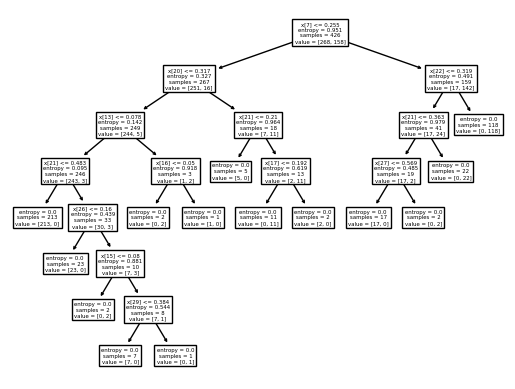

In [29]:
from sklearn import tree

tree.plot_tree(dt)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.965034965034965

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 200)
gbc.fit(x_train, y_train)
gbc.score(x_test, y_test)

0.958041958041958